In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [29]:
data=pd.read_csv(r"/content/predictive_maintenance_dataset.csv")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [30]:
data=data.drop(columns=['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'])
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [31]:
print("Shape of Datasets=",data.shape)
print("Class Distribution=",data['Machine failure'].value_counts())

Shape of Datasets= (10000, 7)
Class Distribution= Machine failure
0    9661
1     339
Name: count, dtype: int64


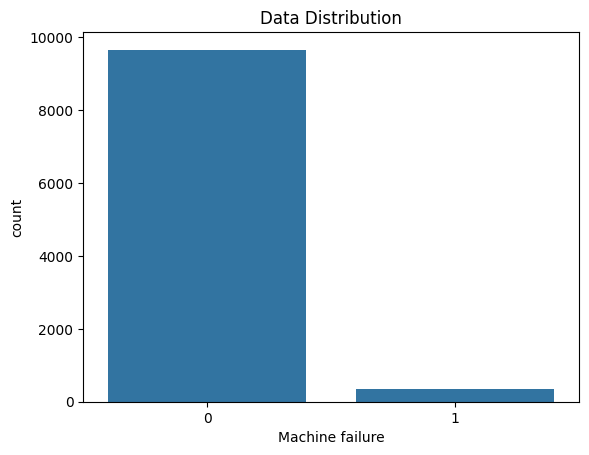

In [32]:
sns.countplot(data=data,x='Machine failure')
plt.title("Data Distribution")
plt.show()

In [33]:
data = pd.get_dummies(data, columns=["Type"], drop_first=True)
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,True,False
2,298.1,308.5,1498,49.4,5,0,True,False
3,298.2,308.6,1433,39.5,7,0,True,False
4,298.2,308.7,1408,40.0,9,0,True,False
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,True
9996,298.9,308.4,1632,31.8,17,0,False,False
9997,299.0,308.6,1645,33.4,22,0,False,True
9998,299.0,308.7,1408,48.5,25,0,False,False


In [34]:

X=data.drop('Machine failure',axis=1)
y=data['Machine failure']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
smote=SMOTE(random_state=42)
X_train_bal,y_train_bal=smote.fit_resample(X_train,y_train)
X_train_bal,y_train_bal

(       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
 0               302.000000               310.900000                    1456   
 1               297.000000               308.300000                    1399   
 2               301.000000               311.600000                    1357   
 3               298.900000               309.800000                    1411   
 4               297.100000               308.500000                    1733   
 ...                    ...                      ...                     ...   
 15453           302.667936               311.203807                    1279   
 15454           298.823242               310.001981                    2252   
 15455           298.669439               308.844045                    1456   
 15456           299.095066               308.797650                    1328   
 15457           302.700000               310.667177                    1366   
 
        Torque [Nm]  Tool wear [min]  

In [36]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train_bal, y_train_bal)
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=300, random_state=42)

In [37]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[1877   55]
 [  19   49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.47      0.72      0.57        68

    accuracy                           0.96      2000
   macro avg       0.73      0.85      0.78      2000
weighted avg       0.97      0.96      0.97      2000


ROC-AUC Score: 0.9578804347826086


In [38]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train_bal)
X_test_scale=scaler.transform(X_test)

In [39]:
Lg=LogisticRegression()
Lg.fit(X_train_scale,y_train_bal)

LogisticRegression()

In [40]:
y_pred = Lg.predict(X_test_scale)
y_prob = Lg.predict_proba(X_test_scale)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[1689  243]
 [  18   50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1932
           1       0.17      0.74      0.28        68

    accuracy                           0.87      2000
   macro avg       0.58      0.80      0.60      2000
weighted avg       0.96      0.87      0.91      2000


ROC-AUC Score: 0.8783034953111679


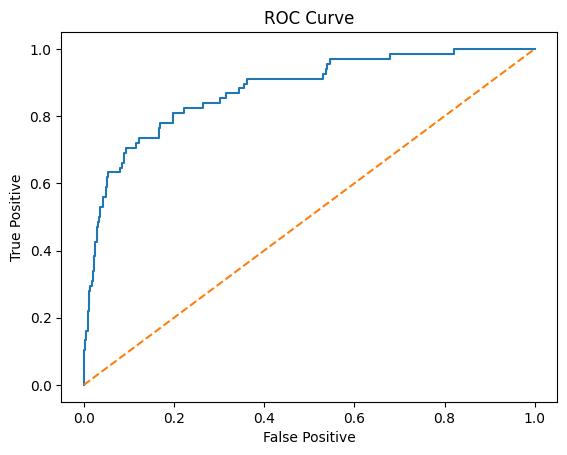

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.show()